Importing necessary libraries:


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

Loading the dataset

In [ ]:
dataset_path = '/content/Final_cleaned_Concatenated_CostReport_clean (3).csv'
df = pd.read_csv(dataset_path)

<ipython-input-2-41e5a5b22b8f>:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


Defining feature and target variables

In [ ]:
features = [
    'Gross_Revenue', 'Less Total Operating Expense', 'Number_of_Beds', 'City', 'Total liabilities', 'Total_Assets', 'Net_Patient_Revenue', 'Total Other Income',
    'Total Charges', 'Salaries_wages_and_fees_payable', 'Total_Costs', 'Accounts_Receivable', 'NF Admissions Total', 'Buildings', 'Inpatient Revenue', 'Outpatient Revenue'
]
target = 'Net Income'

Set a binary target (investment-worthy or not)

In [ ]:
threshold = 0
df['Investment_Worthy'] = np.where(df[target] > threshold, 1, 0)

In [ ]:
X = df[features]
y = df['Investment_Worthy']

Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Preprocessing the pipelines

In [ ]:
numeric_features = [
'Gross_Revenue', 'Less Total Operating Expense', 'Number_of_Beds', 'Total liabilities', 'Total_Assets', 'Net_Patient_Revenue', 'Total Other Income',
    'Total Charges', 'Salaries_wages_and_fees_payable', 'Total_Costs', 'Accounts_Receivable', 'NF Admissions Total', 'Buildings', 'Inpatient Revenue', 'Outpatient Revenue'

]
categorical_features = ['City']
numeric_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='constant', fill_value=0)),
('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)
]
)

Models

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier()
}

In [ ]:
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])


Performance metrics

In [ ]:
results = {}

for name, pipeline in pipelines.items():
    print(f"Training {name} Model")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if hasattr(pipeline.named_steps['model'], 'predict_proba'):
        roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    else:
        roc_auc = None

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'mse': mse,
        'r2': r2
    }

    print(f"{name} Model Results:")
    print(f"Accuracy Score: {accuracy}")
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2) Score: {r2}")
    if roc_auc is not None:
        print(f"ROC-AUC Score: {roc_auc}")
    else:
        print("ROC-AUC Score: Not applicable")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

Training LogisticRegression Model
LogisticRegression Model Results:
Accuracy Score: 0.9043003669897431
Precision Score: 0.9059159885530583
Recall Score: 0.9043003669897431
F1 Score: 0.8688178290222116
Mean Squared Error (MSE): 0.0956996330102569
R-squared (R2) Score: -0.008922397010212801
ROC-AUC Score: 0.7683639326702496

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.11      0.19      3383
           1       0.90      1.00      0.95     28498

    accuracy                           0.90     31881
   macro avg       0.91      0.55      0.57     31881
weighted avg       0.91      0.90      0.87     31881



Training RandomForestClassifier Model
RandomForestClassifier Model Results:
Accuracy Score: 0.9260688184184938
Precision Score: 0.9189734659335199
Recall Score: 0.9260688184184938
F1 Score: 0.9203846726199282
Mean Squared Error (MSE): 0.07393118158150623
R-squared (R2) Score: 0.22057355301439807
ROC-AUC Score: 0.961299258

Summary of results

In [ ]:
print("\nSummary of Model Results:")
for name, result in results.items():
    roc_auc_str = f"{result['roc_auc']:.2f}" if result['roc_auc'] is not None else "N/A"
    print(f"{name} - Accuracy: {result['accuracy']:.2f}, Precision: {result['precision']:.2f}, "
          f"Recall: {result['recall']:.2f}, F1 Score: {result['f1_score']:.2f}, "
          f"MSE: {result['mse']:.2f}, R2 Score: {result['r2']:.2f}, "
          f"ROC-AUC Score: {roc_auc_str}")



Summary of Model Results:
LogisticRegression - Accuracy: 0.90, Precision: 0.91, Recall: 0.90, F1 Score: 0.87, MSE: 0.10, R2 Score: -0.01, ROC-AUC Score: 0.77
RandomForestClassifier - Accuracy: 0.93, Precision: 0.92, Recall: 0.93, F1 Score: 0.92, MSE: 0.07, R2 Score: 0.22, ROC-AUC Score: 0.96
KNeighborsClassifier - Accuracy: 0.91, Precision: 0.90, Recall: 0.91, F1 Score: 0.90, MSE: 0.09, R2 Score: 0.03, ROC-AUC Score: 0.89


Feature Importance Plot

In [ ]:
def plot_feature_importance(model, feature_names):
    importance = model.named_steps['model'].feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Random Forest - Feature Importance")
    plt.bar(range(len(indices)), importance[indices], align='center')
    plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()


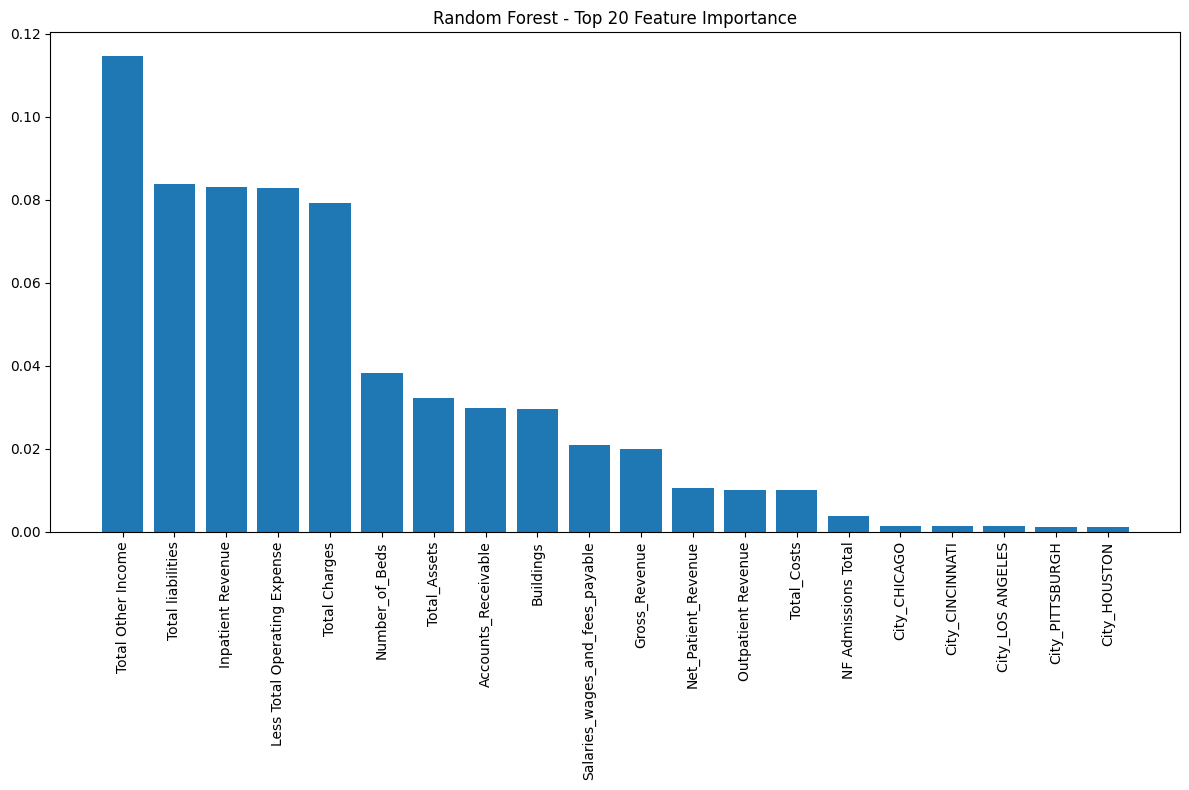

In [ ]:
feature_names = numeric_features + list(
    pipelines['RandomForestClassifier']
    .named_steps['preprocessor']
    .transformers_[1][1]
    .named_steps['onehot']
    .get_feature_names_out(categorical_features)
)

def plot_top_feature_importance(model, feature_names, top_n=20):
    """Plot the top N feature importance scores for a model."""
    importance = model.named_steps['model'].feature_importances_
    indices = np.argsort(importance)[::-1][:top_n]
    feature_names = np.array(feature_names)[indices]
    importance = importance[indices]

    plt.figure(figsize=(12, 8))
    plt.title(f"Random Forest - Top {top_n} Feature Importance")
    plt.bar(range(top_n), importance, align='center')
    plt.xticks(range(top_n), feature_names, rotation=90)
    plt.tight_layout()
    plt.show()
plot_top_feature_importance(pipelines['RandomForestClassifier'], feature_names, top_n=20)

Model Comparison bar graph

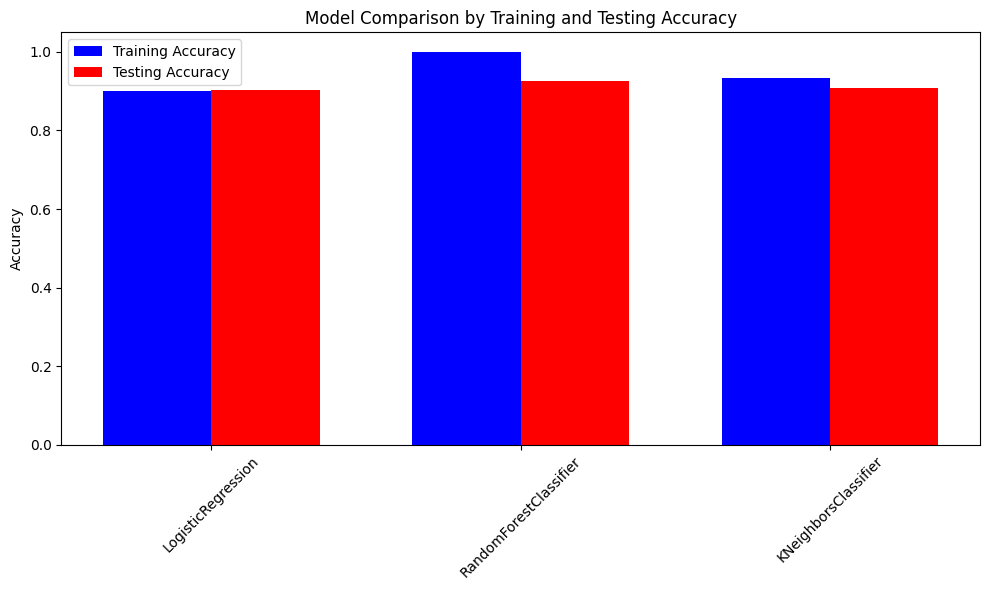

In [ ]:
def evaluate_model(name, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    results = {
        'accuracy_train': accuracy_score(y_train, y_train_pred),
        'accuracy_test': accuracy_score(y_test, y_test_pred)
    }

    return results
results_comparison = {}

for name, pipeline in pipelines.items():
    results_comparison[name] = evaluate_model(name, pipeline, X_train, y_train, X_test, y_test)
metrics = ['accuracy']
train_test_labels = ['Training', 'Testing']
n_models = len(results_comparison)
model_names = list(results_comparison.keys())
train_values = [results_comparison[model]['accuracy_train'] for model in model_names]
test_values = [results_comparison[model]['accuracy_test'] for model in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, train_values, width, label='Training Accuracy', color='blue')
plt.bar(x + width / 2, test_values, width, label='Testing Accuracy', color='red')

plt.title("Model Comparison by Training and Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(x, model_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
def check_overfitting(name, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
    test_accuracy = accuracy_score(y_test, pipeline.predict(X_test))

    print(f"{name} - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")
    return train_accuracy, test_accuracy

for name, pipeline in pipelines.items():
    train_acc, test_acc = check_overfitting(name, pipeline, X_train, y_train, X_test, y_test)
    if train_acc - test_acc > 0.1:
        print(f"{name} appears to be overfitting")


LogisticRegression - Training Accuracy: 0.90, Testing Accuracy: 0.90
RandomForestClassifier - Training Accuracy: 1.00, Testing Accuracy: 0.93
KNeighborsClassifier - Training Accuracy: 0.93, Testing Accuracy: 0.91


Confusion Matrix and Residual Histogram


Logistic Regression - Training Confusion Matrix:


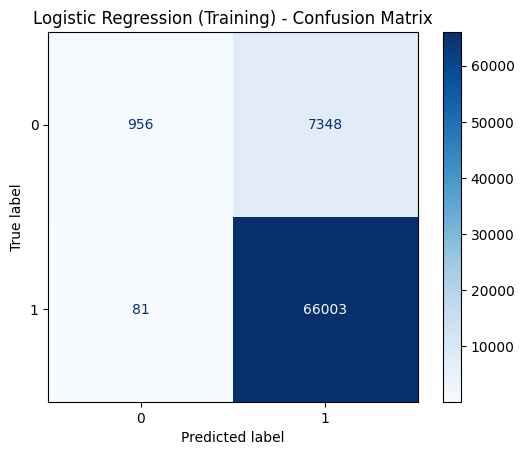


Logistic Regression - Testing Confusion Matrix:


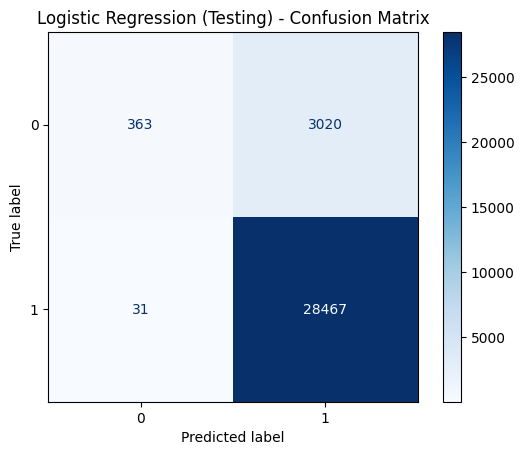


Logistic Regression - Training Residual Histogram:


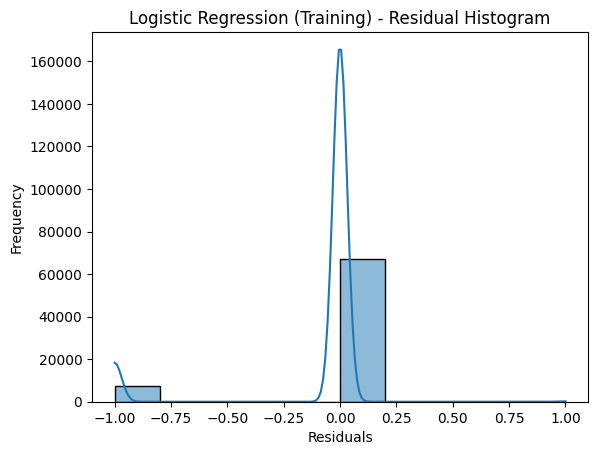


Logistic Regression - Testing Residual Histogram:


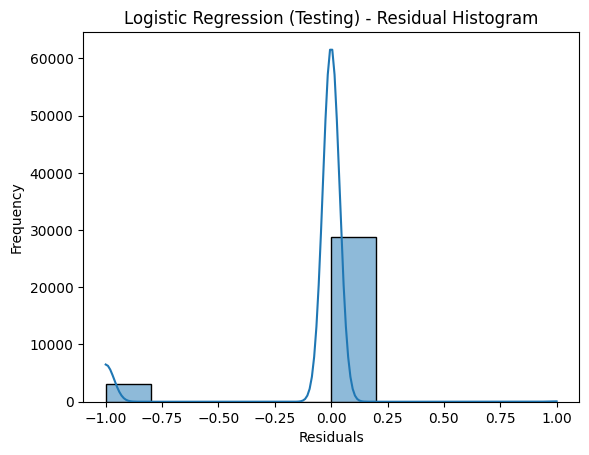


Random Forest Classifier - Training Confusion Matrix:


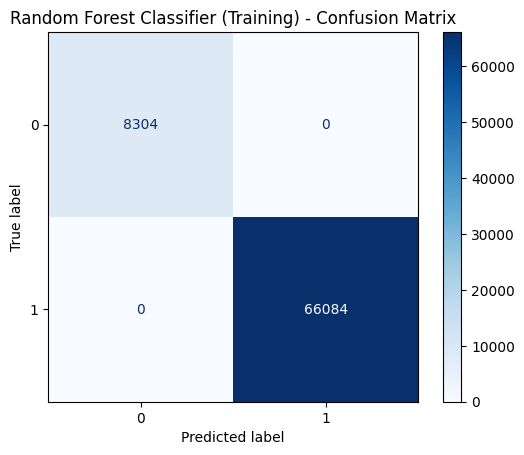


Random Forest Classifier - Testing Confusion Matrix:


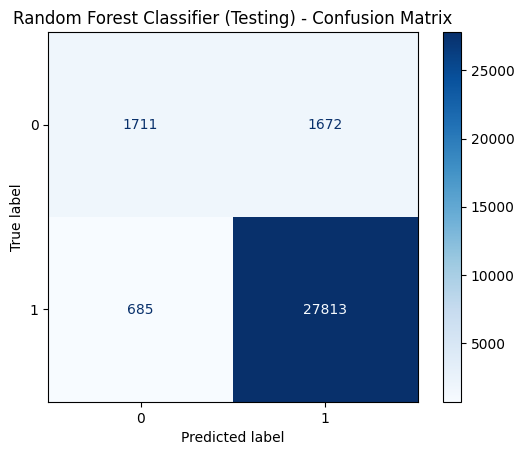


Random Forest Classifier - Training Residual Histogram:


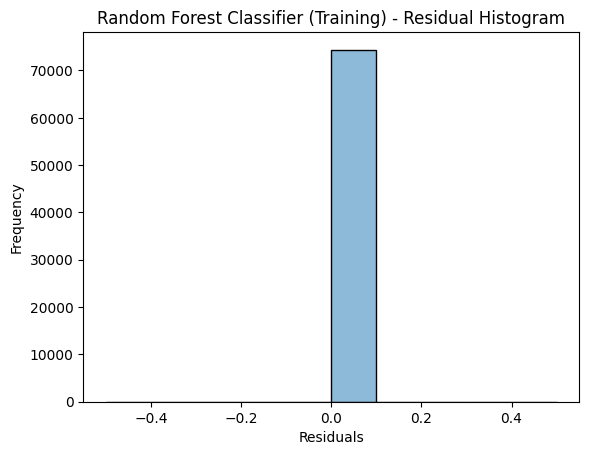


Random Forest Classifier - Testing Residual Histogram:


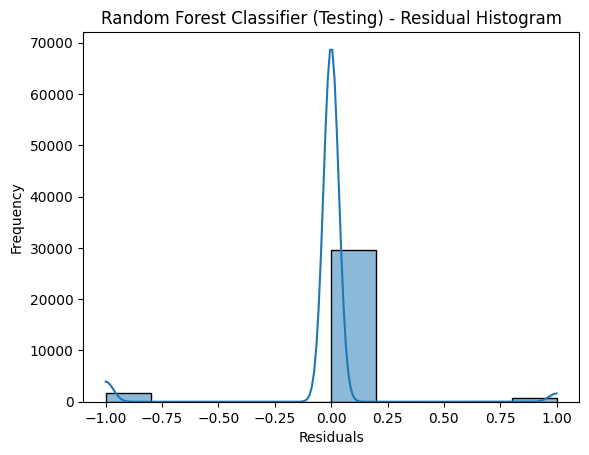


K Neighbors Classifier - Training Confusion Matrix:


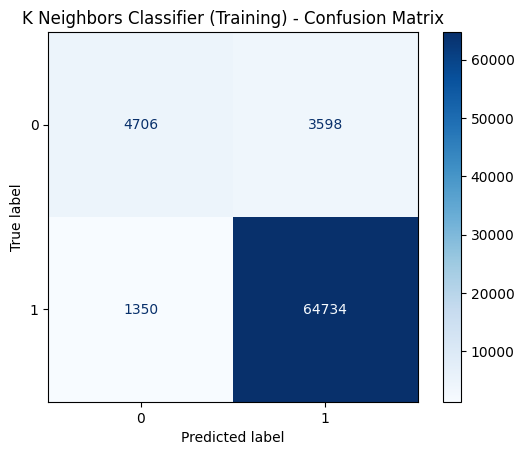


K Neighbors Classifier - Testing Confusion Matrix:


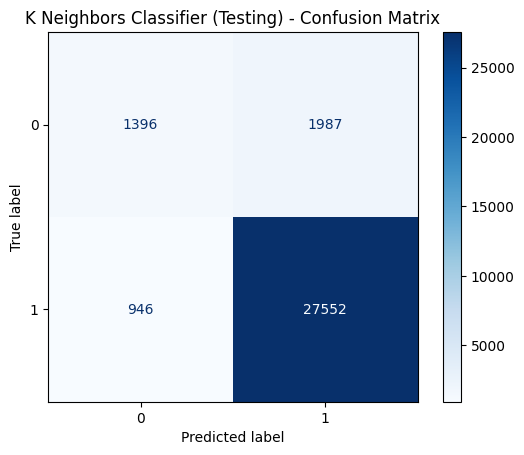


K Neighbors Classifier - Training Residual Histogram:


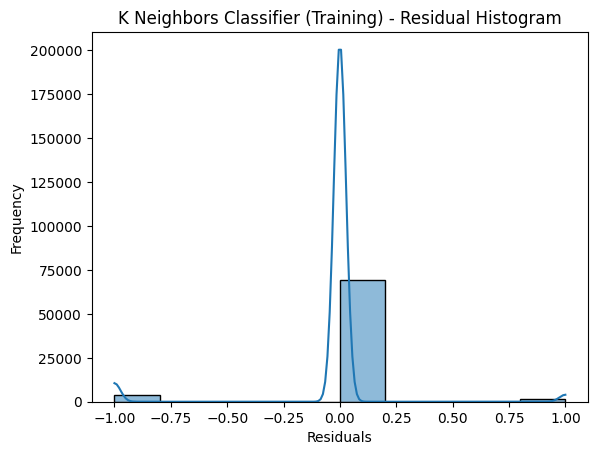


K Neighbors Classifier - Testing Residual Histogram:


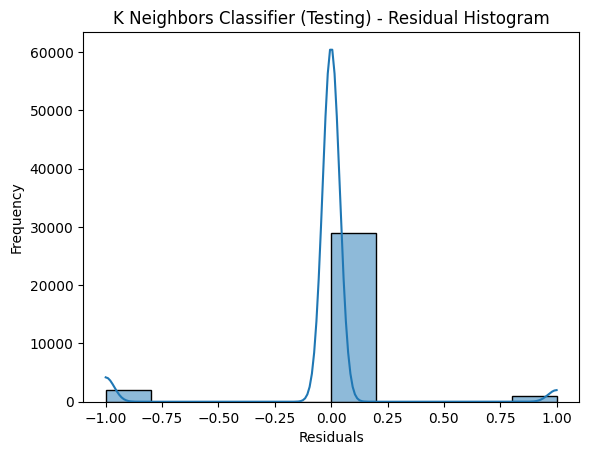

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def compute_residuals(pipeline, X, y):
    predictions = pipeline.predict(X)
    return y - predictions

def plot_confusion_matrix(name, pipeline, X, y):
    predictions = pipeline.predict(X)
    cm = confusion_matrix(y, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

def plot_residual_histogram(name, pipeline, X, y):
    residuals = compute_residuals(pipeline, X, y)
    sns.histplot(residuals, kde=True, bins=10)
    plt.title(f'{name} - Residual Histogram')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

def residual_analysis(name, pipeline, X_train, y_train, X_test, y_test):
    print(f'\n{name} - Training Confusion Matrix:')
    plot_confusion_matrix(f'{name} (Training)', pipeline, X_train, y_train)

    print(f'\n{name} - Testing Confusion Matrix:')
    plot_confusion_matrix(f'{name} (Testing)', pipeline, X_test, y_test)

    print(f'\n{name} - Training Residual Histogram:')
    plot_residual_histogram(f'{name} (Training)', pipeline, X_train, y_train)

    print(f'\n{name} - Testing Residual Histogram:')
    plot_residual_histogram(f'{name} (Testing)', pipeline, X_test, y_test)

residual_analysis('Logistic Regression', pipelines['LogisticRegression'], X_train, y_train, X_test, y_test)
residual_analysis('Random Forest Classifier', pipelines['RandomForestClassifier'], X_train, y_train, X_test, y_test)
residual_analysis('K Neighbors Classifier', pipelines['KNeighborsClassifier'], X_train, y_train, X_test, y_test)



In [ ]:
!jupyter nbconvert --to html Final_Code.ipynb

[NbConvertApp] Converting notebook Final_Code.ipynb to html
[NbConvertApp] Writing 1205768 bytes to Final_Code.html
